In [1]:
library(e1071)
library(ggplot2)

In [2]:
# reading data
svm_data <- read.csv("../../datasets/knn.csv")
head(svm_data)

age,salary,level
30,250000,Level A
20,400000,Level A
35,300000,Level A
24,270000,Level A
26,380000,Level A
21,320000,Level A


In [3]:
# building SVM model
svm_model <- svm(level~., data = svm_data, kernel = "linear")
svm_model


Call:
svm(formula = level ~ ., data = svm_data, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  5


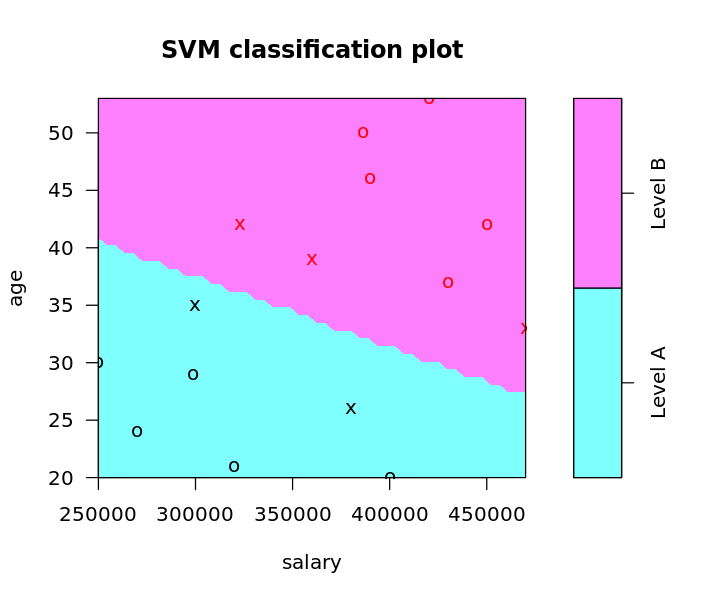

In [4]:
# visualizing the model
options(repr.plot.width=6, repr.plot.height=5)
plot(svm_model, svm_data)

In [5]:
# accuracy of the model
addmargins(table(predict(svm_model,svm_data),svm_data$level))
# 100% accurate

,Level A,Level B,Sum
Level A,7,0,7
Level B,0,8,8
Sum,7,8,15


In [6]:
# Slack Variable
svm_model$epsilon

[1] 0.1

In [7]:
# Regularization parameter C controls margin length. It is inversely proportional to margin length.
svm_model$cost   # smaller value is acceptable

[1] 1

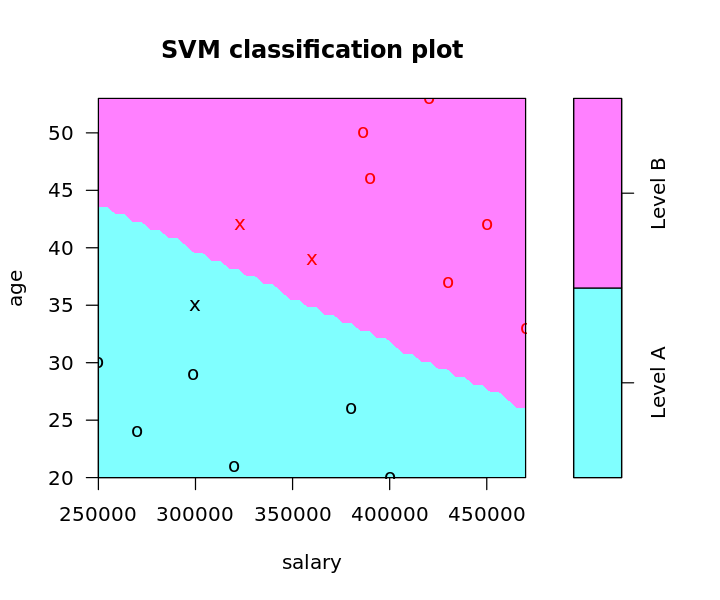

In [8]:
# Comparing SVM model on different values of C
svm_c_10000 <- svm(level~., data = svm_data, kernel = "linear", cost = 10000)
plot(svm_c_10000, svm_data)

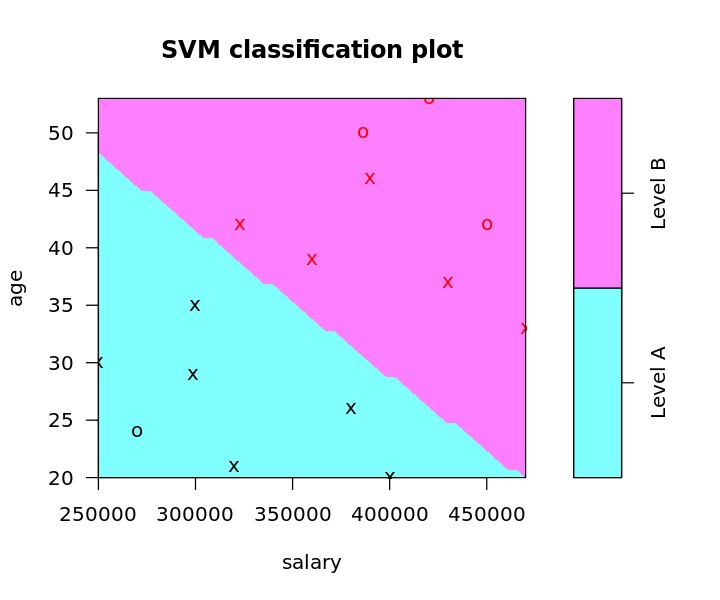

In [9]:
svm_c_0.1 <- svm(level~., data = svm_data, kernel = "linear", cost = 0.1)
plot(svm_c_0.1, svm_data)

In [10]:
# Best value of C - cross-validation
tune_c <- tune(svm, level~., 
               data = svm_data, 
               kernel = "linear",
               ranges = list(cost = c(0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000)))
tune_c$best.model                # Best value of C = 0.1


Call:
best.tune(method = svm, train.x = level ~ ., data = svm_data, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 10, 100, 1000, 10000)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  11


In [11]:
# Gamma is a hyper-parameter used to estimate the classification error.
# Best value of Gamma can also be found out using CV.
tune_gamma <- tune(svm, level~., 
               data = svm_data, 
               kernel = "linear",
               ranges = list(gamma = c(0.001, 0.01, 0.1, 1, 3, 5, 7, 10)))
tune_gamma$best.model                # Best value of gamma = 0.001


Call:
best.tune(method = svm, train.x = level ~ ., data = svm_data, ranges = list(gamma = c(0.001, 
    0.01, 0.1, 1, 3, 5, 7, 10)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.001 

Number of Support Vectors:  5


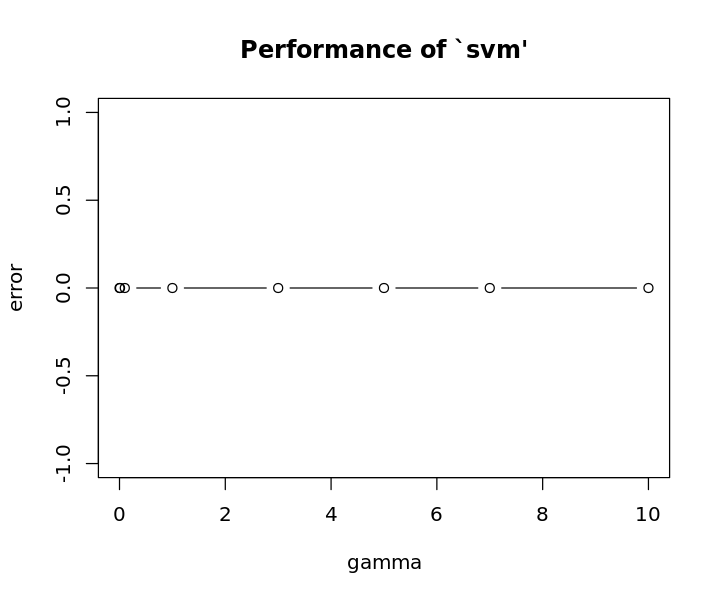

In [12]:
plot(tune_gamma)                     # No misclassified value on all the provided values to gamma.

# Non-linear kernel

In [13]:
svm_data <- read.csv("../../datasets/svm.csv")
head(svm_data)
levels(svm_data$y)

X1,X2,y
1.0,2.4,Category A
1.2,2.8,Category A
1.5,1.6,Category A
2.0,3.2,Category A
2.5,2.0,Category A
3.0,1.8,Category A


[1] "Category A" "Category B"

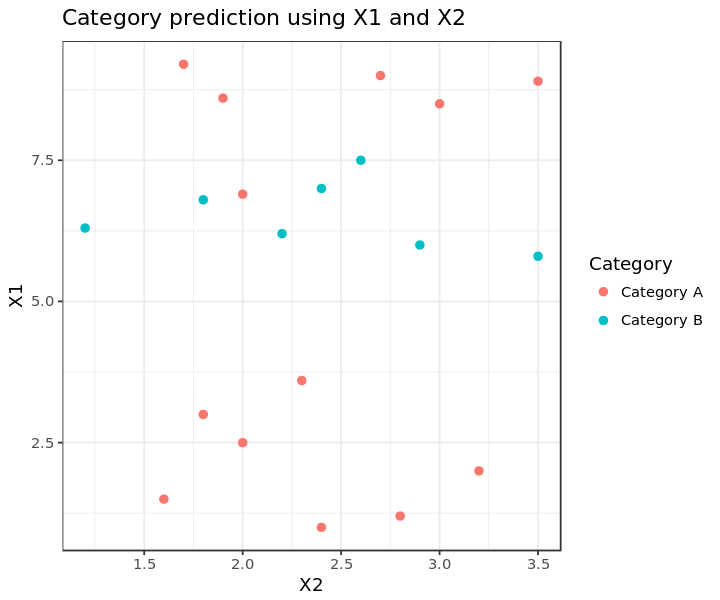

In [14]:
# visualizing the data
Category <- svm_data$y
ggplot() +
          geom_point(aes(svm_data$X2, svm_data$X1, col = Category), cex = 2) +
          xlab("X2") + ylab("X1") + ggtitle("Category prediction using X1 and X2") +
          theme_bw()

In [15]:
# builing SVM non-linear model - using tune for degree of polynomial
tune_svm <- tune(svm, y~., data = svm_data, kernel = "polynomial",
                 ranges = list(degree = c(1, 2, 3, 4, 5)))
tune_svm$best.model
# So, a polynomial of order 2 is best suited to classify given data


Call:
best.tune(method = svm, train.x = y ~ ., data = svm_data, ranges = list(degree = c(1, 
    2, 3, 4, 5)), kernel = "polynomial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
      gamma:  0.5 
     coef.0:  0 

Number of Support Vectors:  15


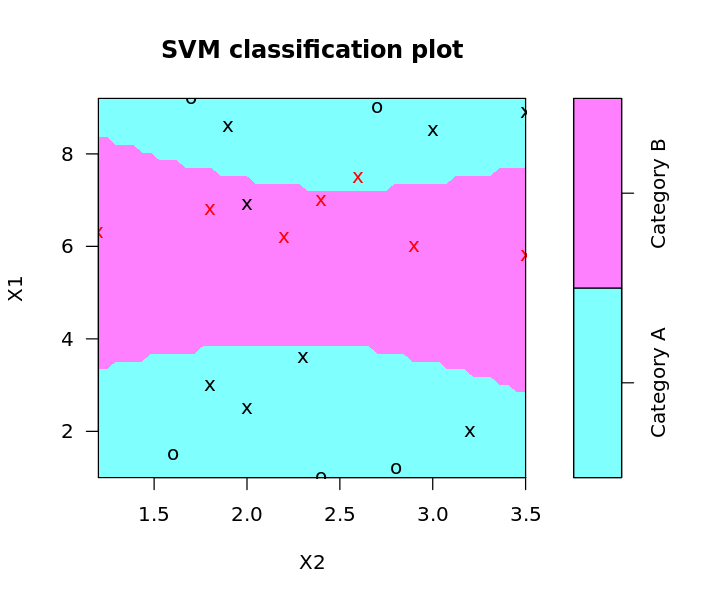

In [16]:
svm_model <- svm(y~., data = svm_data, kernel = "polynomial", degree = 2)

plot(svm_model, svm_data)

# Multiple class classification using SVM

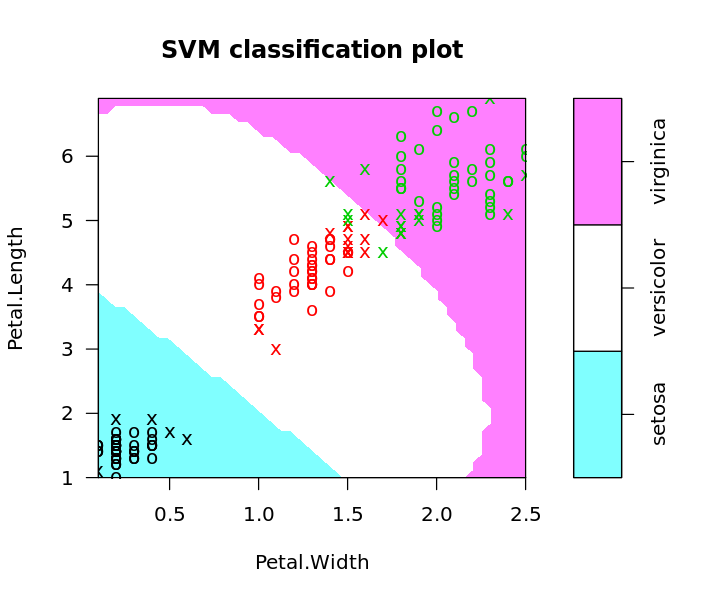

In [17]:
iris_df <- subset.data.frame(iris, select = c("Petal.Length", "Petal.Width", "Species"))

svm_model <- svm(Species~., data = iris_df, kernel = "radial")
plot(svm_model, iris_df)